In [351]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy.stats import ttest_ind, chi2_contingency
import warnings
from pandas import MultiIndex #, Int64Index # changed
warnings.filterwarnings('ignore')
import os

In [352]:
df = pd.read_csv("Diabetes-dataset_1.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


## Understand the dataset
Each record / row is a data of a patient.

- Pregnancies: Number of times pregnant
- Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test
- BloodPressure: Diastolic blood pressure (mm Hg)
- SkinThickness: Triceps skin fold thickness (mm)
- Insulin: 2-Hour serum insulin (mu U/ml)
- BMI: Body mass index (weight in kg/(height in m)^2)
- DiabetesPedigreeFunction: Diabetes pedigree function.
  - Its calculated score that estimates a person's likelihood of developing diabetes based on their family history of the disease, essentially acting as a measure of how strong their genetic predisposition to diabetes is; a higher value indicates a greater family history of diabetes and thus a higher potential risk for the individual.
  - This probability realistically ranges of 0.08 to 2.42.
- Age: Age (years)
- Outcome: Class variable (0 or 1)

## Identifying the dimensions

In [353]:
df.shape

(768, 9)

In [354]:
columns = df.columns
columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [355]:
#To print first few elements
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Variable identification
Lets see what types of variables we are dealing with.

In [356]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

Here, all variables are continuous in nature, and there are no categorical variable

## Univarient Analysis

In [357]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


<Axes: title={'center': 'Outcome'}, ylabel='Frequency'>

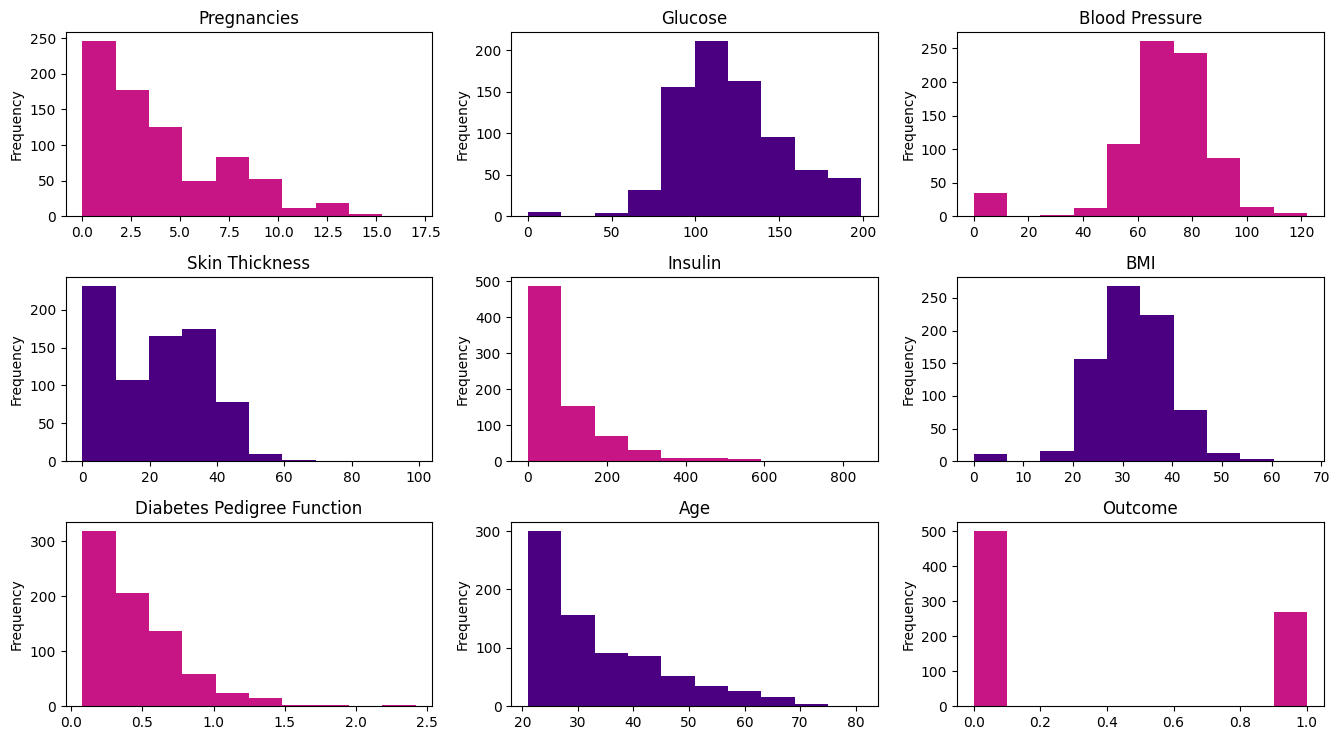

In [358]:
plt.rcParams["figure.figsize"] = [13.50, 7.50]
plt.rcParams["figure.autolayout"] = True
figure, axis = plt.subplots(3, 3)
  
df['Pregnancies'].plot.hist(title="Pregnancies",ax=axis[0][0],color="MEDIUMVIOLETRED")
df['Glucose'].plot.hist(title="Glucose",ax=axis[0][1],color="INDIGO")
df['BloodPressure'].plot.hist(title="Blood Pressure",ax=axis[0][2],color="MEDIUMVIOLETRED")
df['SkinThickness'].plot.hist(title="Skin Thickness",ax=axis[1][0],color="INDIGO")
df['Insulin'].plot.hist(title="Insulin",ax=axis[1][1],color="MEDIUMVIOLETRED")
df['BMI'].plot.hist(title="BMI",ax=axis[1][2],color="INDIGO")
df['DiabetesPedigreeFunction'].plot.hist(title="Diabetes Pedigree Function",ax=axis[2][0],color="MEDIUMVIOLETRED")
df['Age'].plot.hist(title="Age",ax=axis[2][1],color="INDIGO")
df['Outcome'].plot.hist(title="Outcome",ax=axis[2][2],color="MEDIUMVIOLETRED")

## Draw box plots
Compare data sets: Box plots are useful for comparing the distribution of data across multiple groups. 

Identify outliers: Box plots can show if there are any unusual values in the data set. 

Understand distribution: Box plots can show the shape of the distribution, including the center, spread, and skew. 

Answer questions: Box plots can help answer questions about the data, such as how it's distributed and if there are any outliers. 

### How do box plots work?
Box plots are based on a data set's quartiles, which divide the data into four equal parts.

The box represents the middle 50% of the data, with the top and bottom of the box representing the 75th and 25th percentiles. 

The distance between the 25th and 75th percentiles is called the interquartile range (IQR). 

The whiskers extend from the box to the furthest data point within 1.5 times the IQR. 

Data points that are further than that distance are considered outliers and are marked with a dot. 

<Axes: title={'center': 'Outcome'}>

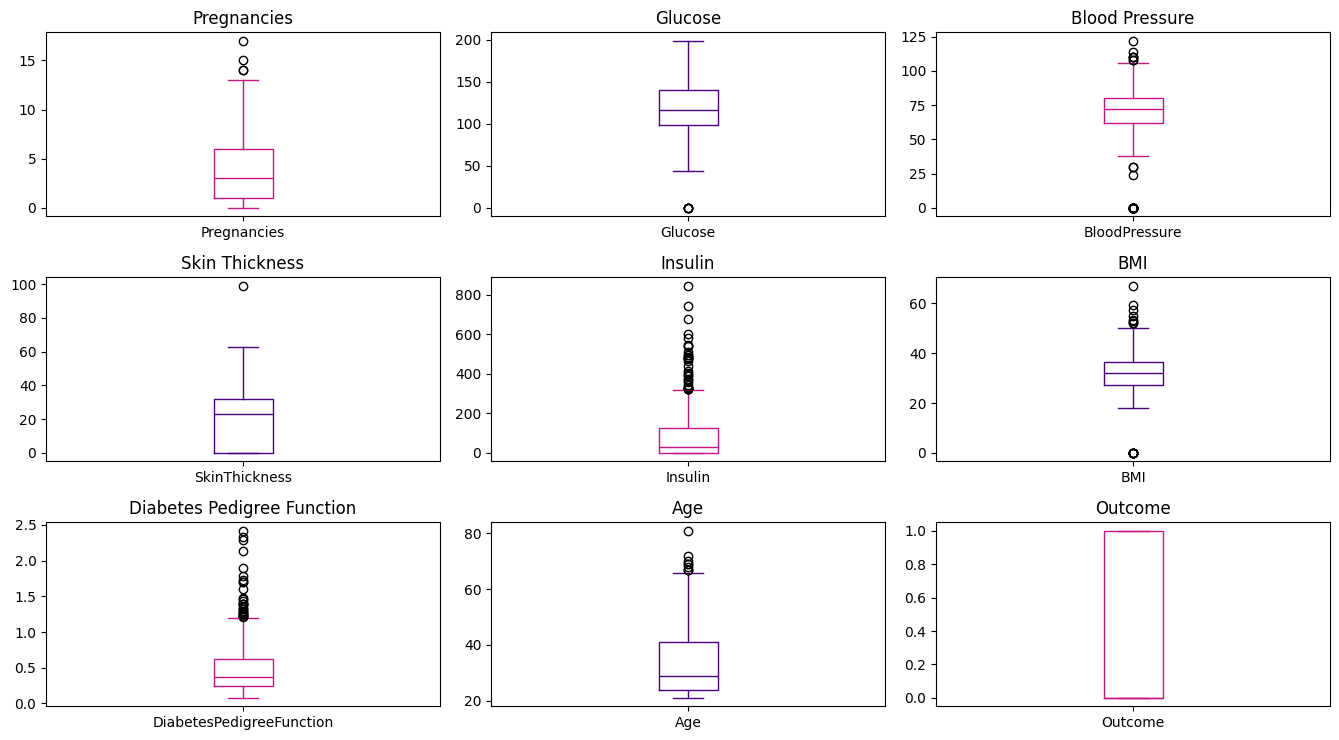

In [359]:
plt.rcParams["figure.figsize"] = [13.50, 7.50]
plt.rcParams["figure.autolayout"] = True
figure, axis = plt.subplots(3, 3)
  
df['Pregnancies'].plot.box(title="Pregnancies",ax=axis[0][0],color="MEDIUMVIOLETRED")
df['Glucose'].plot.box(title="Glucose",ax=axis[0][1],color="INDIGO")
df['BloodPressure'].plot.box(title="Blood Pressure",ax=axis[0][2],color="MEDIUMVIOLETRED")
df['SkinThickness'].plot.box(title="Skin Thickness",ax=axis[1][0],color="INDIGO")
df['Insulin'].plot.box(title="Insulin",ax=axis[1][1],color="MEDIUMVIOLETRED")
df['BMI'].plot.box(title="BMI",ax=axis[1][2],color="INDIGO")
df['DiabetesPedigreeFunction'].plot.box(title="Diabetes Pedigree Function",ax=axis[2][0],color="MEDIUMVIOLETRED")
df['Age'].plot.box(title="Age",ax=axis[2][1],color="INDIGO")
df['Outcome'].plot.box(title="Outcome",ax=axis[2][2],color="MEDIUMVIOLETRED")

## Bivarient Analysis
- Analysis of two variables to determine relationships between them.
- A positive correlation means that when one variable goes up, so does the other. A negative correlation shows that when one variable goes up, the other one goes down.

In [360]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


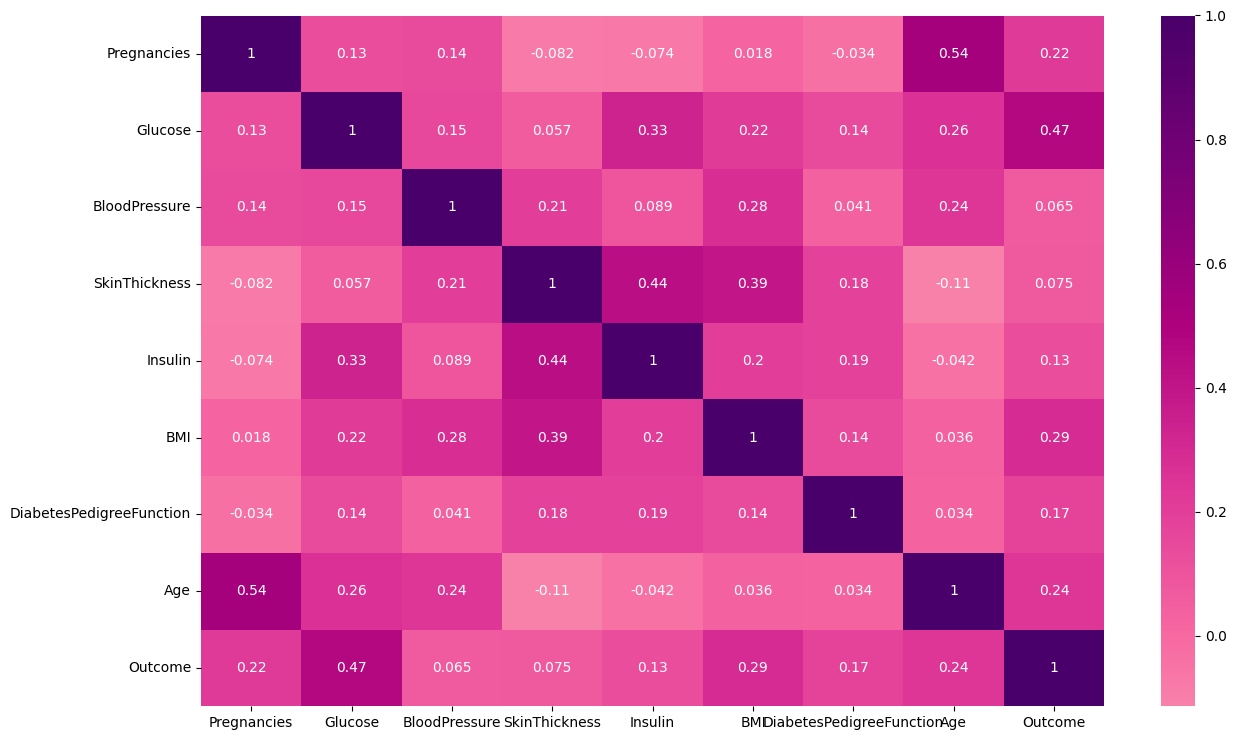

In [361]:
# The colors from below code helps identifying the strength of correlation. Darker color means high correlations
dataplot = sns.heatmap(df.corr(), cmap='RdPu', annot=True, center=0)

Checking highly correlated attributes

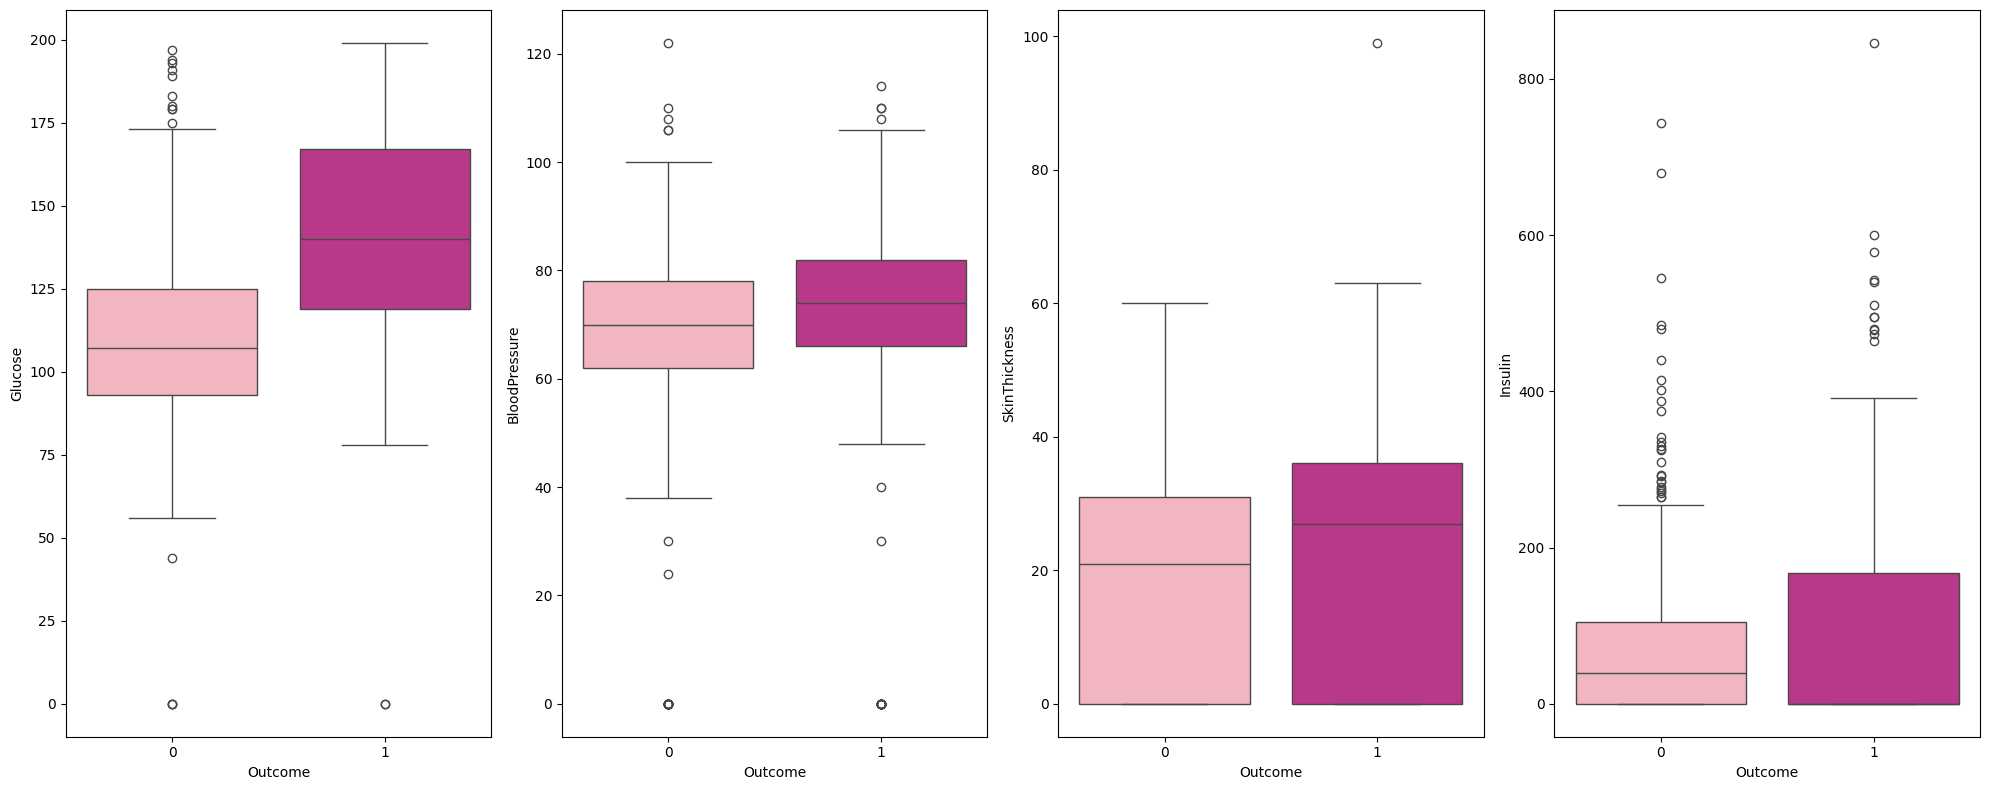

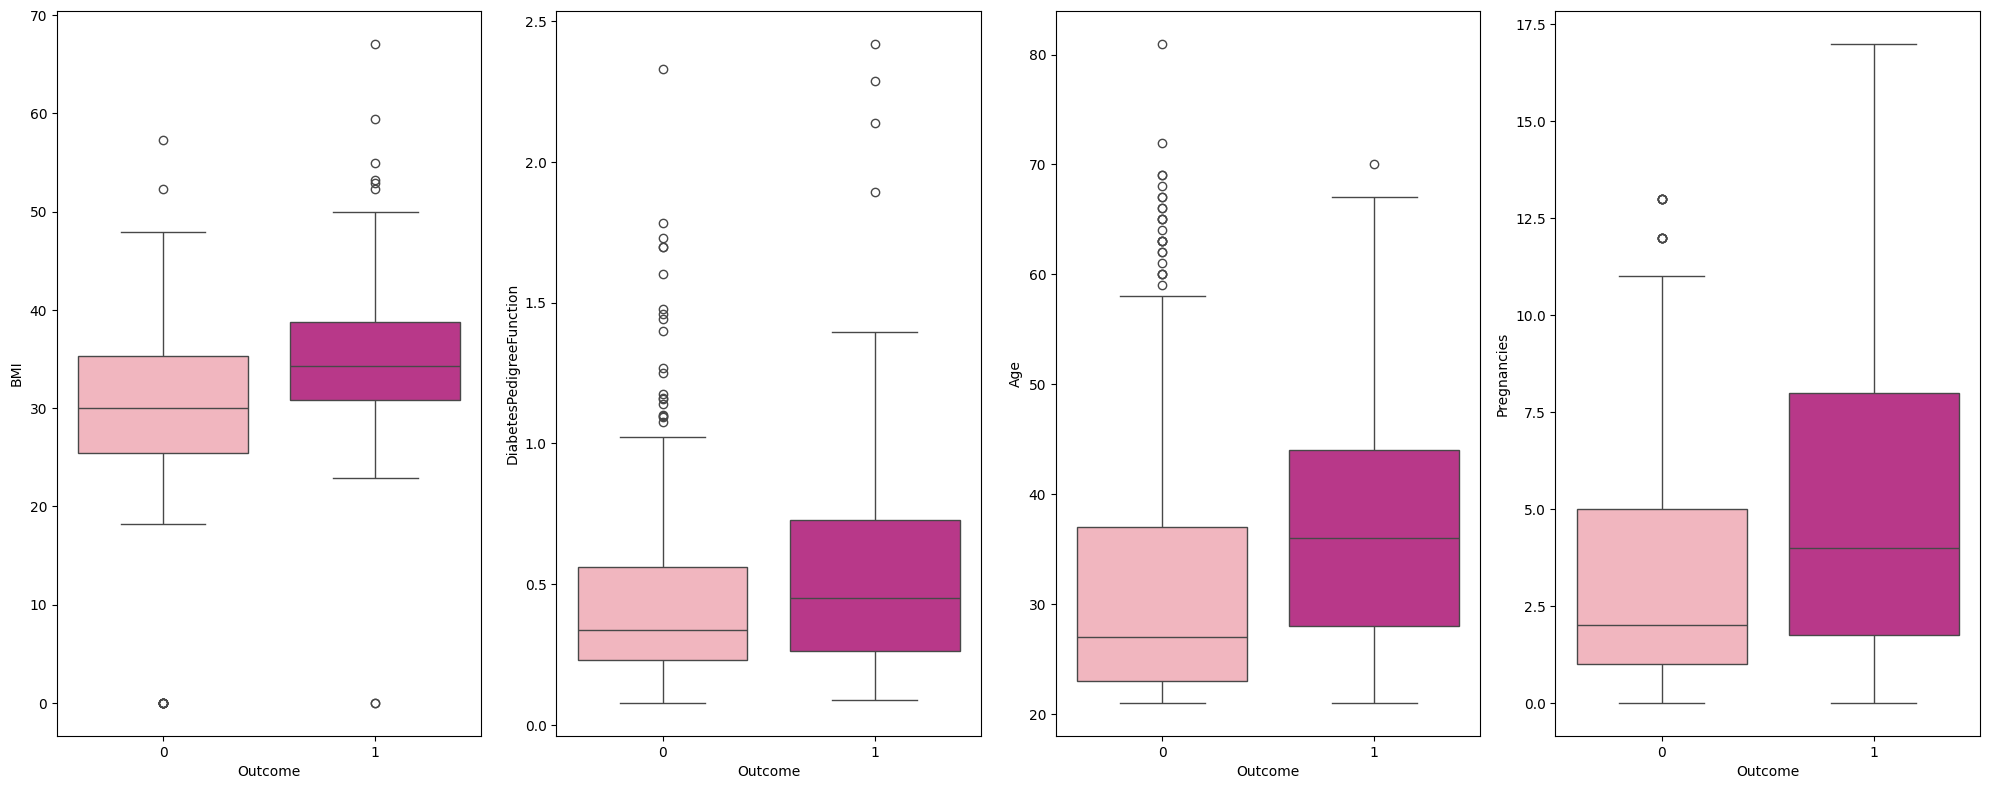

In [362]:
plt.rcParams['figure.figsize'] = (20, 8)

# First row of boxplots
f, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4)

sns.boxplot(x='Outcome', y='Glucose', data=df, ax=ax1, palette="RdPu")
sns.boxplot(x='Outcome', y='BloodPressure', data=df, ax=ax2, palette="RdPu")
sns.boxplot(x='Outcome', y='SkinThickness', data=df, ax=ax3, palette="RdPu")
sns.boxplot(x='Outcome', y='Insulin', data=df, ax=ax4, palette="RdPu")

f.tight_layout()

# Second row of boxplots
f, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4)

sns.boxplot(x='Outcome', y='BMI', data=df, ax=ax1, palette="RdPu")
sns.boxplot(x='Outcome', y='DiabetesPedigreeFunction', data=df, ax=ax2, palette="RdPu")
sns.boxplot(x='Outcome', y='Age', data=df, ax=ax3, palette="RdPu")
sns.boxplot(x='Outcome', y='Pregnancies', data=df, ax=ax4, palette="RdPu")

f.tight_layout()
plt.show()


### If 2 variables are highly correlated, then we drop the one of them.

In [363]:

for i in range(len(columns)-1):
    for j in range(i+1,len(columns)):
        if 0.5<=df[columns[i]].corr(df[columns[j]]):
            print("We can drop either "+str(columns[i])+" or "+str(columns[j]))

We can drop either Pregnancies or Age


In [364]:
columns = columns[1:]
df.drop(['Pregnancies'], axis=1, inplace=True)

In [365]:
df

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,148,72,35,0,33.6,0.627,50,1
1,85,66,29,0,26.6,0.351,31,0
2,183,64,0,0,23.3,0.672,32,1
3,89,66,23,94,28.1,0.167,21,0
4,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...
763,101,76,48,180,32.9,0.171,63,0
764,122,70,27,0,36.8,0.340,27,0
765,121,72,23,112,26.2,0.245,30,0
766,126,60,0,0,30.1,0.349,47,1


Hence, here we are dropping Pregnancies attribute because it is highly correlated to Age attribute

## Missing Value Treatment

In [366]:
df.describe()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [367]:
df.isnull().sum()

Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

It **seems** that there are no missing values in the dataset. This actually is not true.
- 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI' should not have 0 values.

In [368]:
diabetes_df_copy = df.copy(deep=True)
diabetes_df_copy[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']] = diabetes_df_copy[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']].replace(0, np.nan)

# Showing the count of NaNs
print(diabetes_df_copy.isnull().sum())

Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


First, let’s visualize the distribution of features 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI' in the dataset **before** removing null values:

array([[<Axes: title={'center': 'Glucose'}>,
        <Axes: title={'center': 'BloodPressure'}>],
       [<Axes: title={'center': 'SkinThickness'}>,
        <Axes: title={'center': 'Insulin'}>],
       [<Axes: title={'center': 'BMI'}>, <Axes: >]], dtype=object)

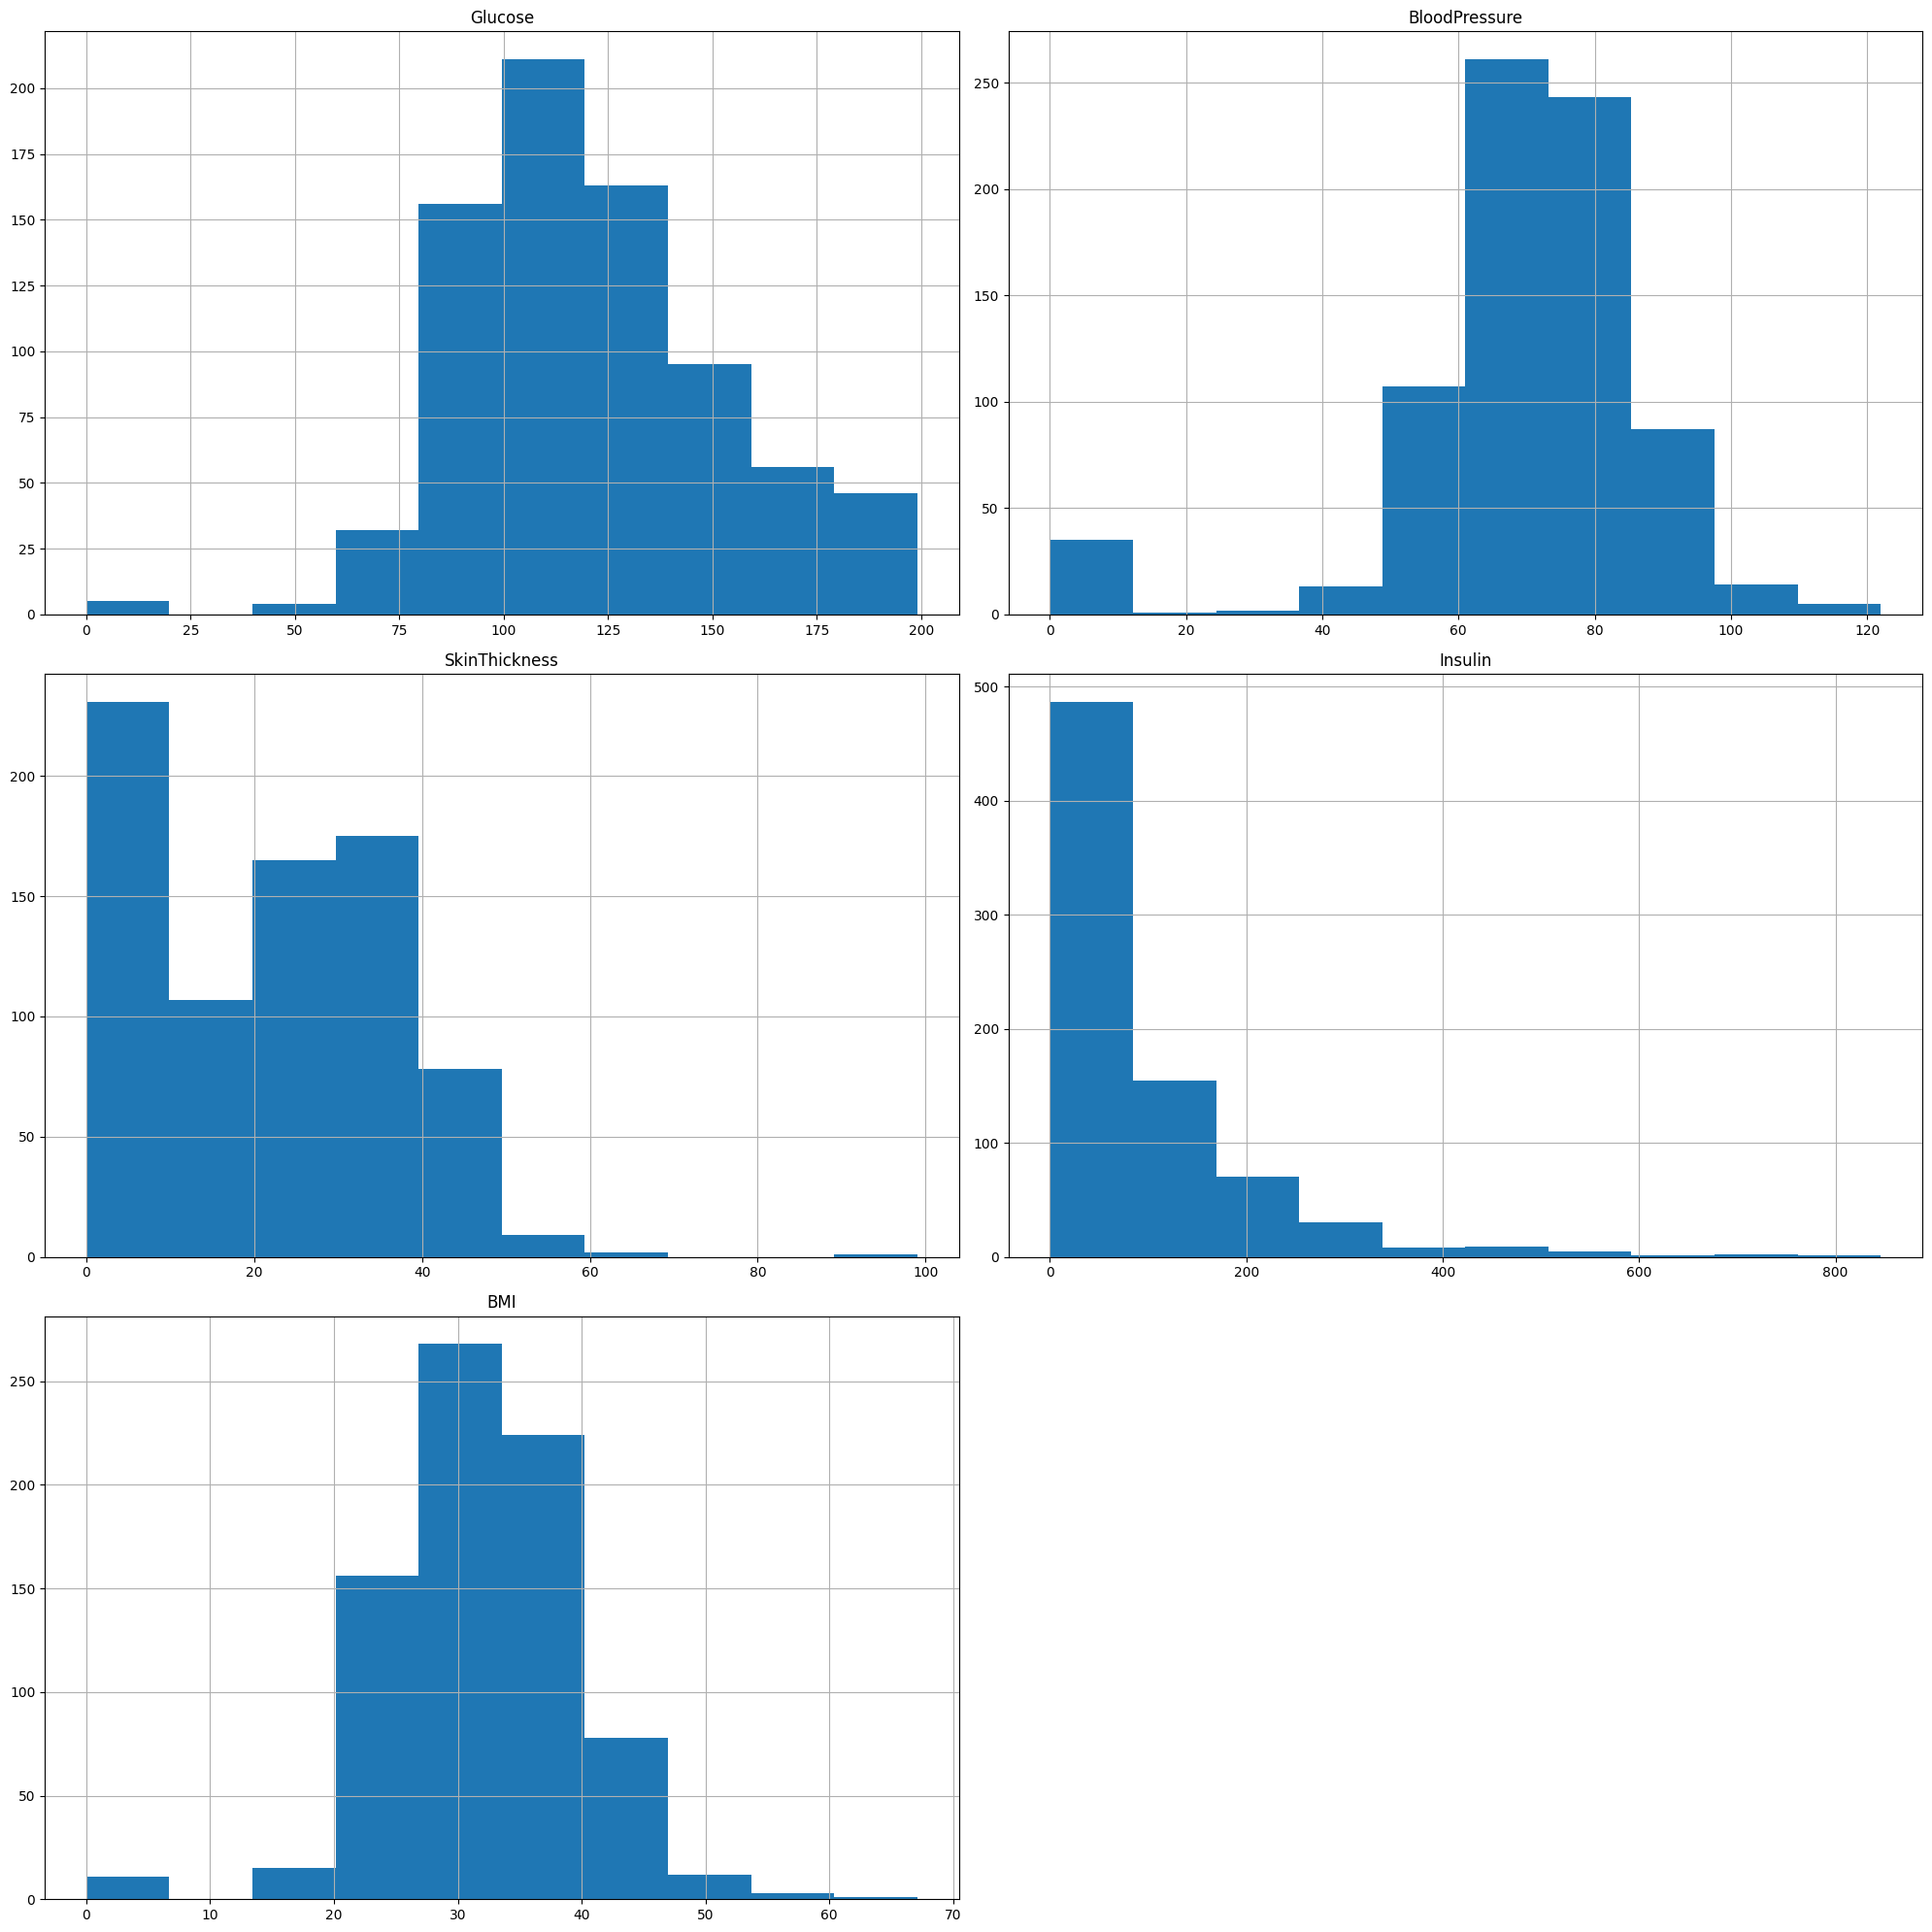

In [369]:
df[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']].hist(figsize=(20, 20))

So here, we have seen the distribution of each feature, whether dependent or independent. We plot the histogram because it shows the occurrence of every value, letting us know the range of the data.

Imputing Missing Values

Now, we will handle the missing values. 
- We can use the KNN / mean value for ‘Glucose’ and ‘BloodPressure’. For reason why, see KDE plot below (before/after)
- We’ll use the median value for ‘SkinThickness’’ ‘Insulin’’ and ‘BMI’:

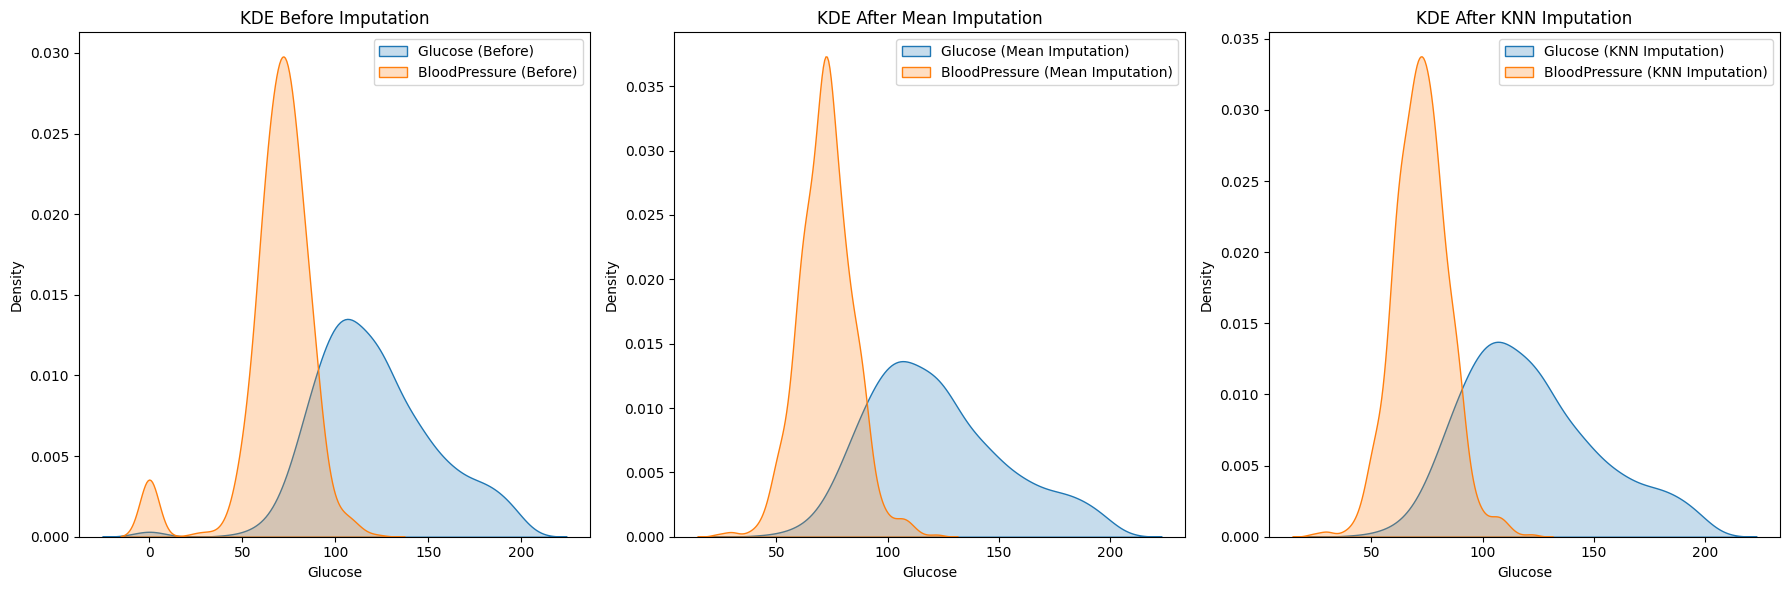

In [370]:
# Columns with invalid zero values
zero_columns = ['Glucose', 'BloodPressure'] #'SkinThickness', 'Insulin', 'BMI']

# Store original data (before imputation)
df_before = df.copy()

# Replace zeroes with NaN before imputation
df[zero_columns] = df[zero_columns].replace(0, np.nan)

# Apply Mean Imputation
df_mean = df.copy()
for col in zero_columns:
    df_mean[col] = df_mean[col].fillna(df_mean[col].mean())

# Apply KNN Imputation
imputer = KNNImputer(n_neighbors=5)
df_knn = df.copy()
df_knn[zero_columns] = imputer.fit_transform(df_knn[zero_columns])

# Create Subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Before Imputation
for col in zero_columns:
    sns.kdeplot(df_before[col], label=f"{col} (Before)", fill=True, ax=axes[0])
axes[0].set_title("KDE Before Imputation")
axes[0].legend()

# After Mean Imputation
for col in zero_columns:
    sns.kdeplot(df_mean[col], label=f"{col} (Mean Imputation)", fill=True, ax=axes[1])
axes[1].set_title("KDE After Mean Imputation")
axes[1].legend()

# After KNN Imputation
for col in zero_columns:
    sns.kdeplot(df_knn[col], label=f"{col} (KNN Imputation)", fill=True, ax=axes[2])
axes[2].set_title("KDE After KNN Imputation")
axes[2].legend()

# Adjust layout
plt.tight_layout()
plt.show()

We notice that KDE graph after imputatin  with KNN or mean values is similar. So I will choose mean imputation here because it is computationally inexpensive compared with KNN.

In [371]:
diabetes_df_copy['Glucose'].fillna(diabetes_df_copy['Glucose'].mean(), inplace=True)
diabetes_df_copy['BloodPressure'].fillna(diabetes_df_copy['BloodPressure'].mean(), inplace=True)

# Showing the count of NaNs
print(diabetes_df_copy.isnull().sum())

Glucose                       0
BloodPressure                 0
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


### Now lets handle 'SkinThickness', 'Insulin', 'BMI'

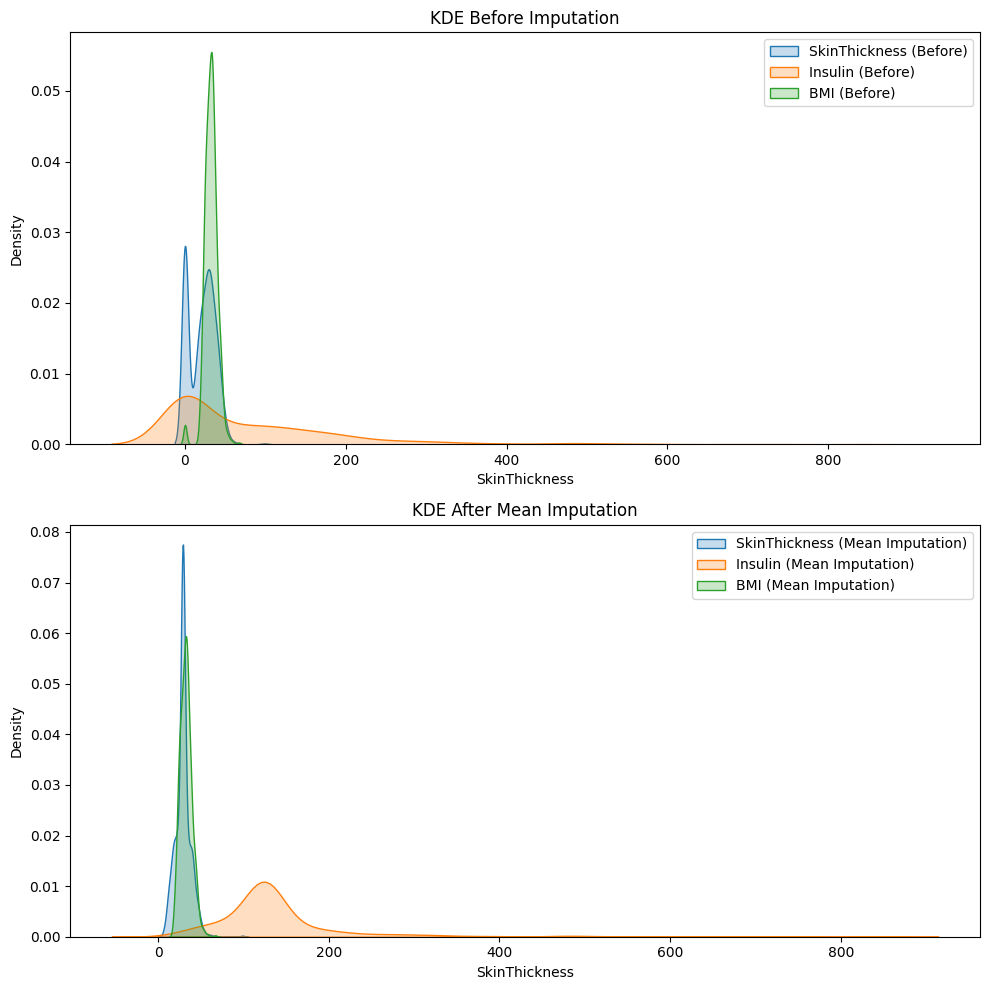

In [372]:
# Columns with invalid zero values
zero_columns = ['SkinThickness', 'Insulin', 'BMI']

# Store original data (before imputation)
df_before = df.copy()

# Replace zeroes with NaN before imputation
df[zero_columns] = df[zero_columns].replace(0, np.nan)

# Apply Median Imputation
df_median = df.copy()
for col in zero_columns:
    df_median[col] = df_median[col].fillna(df_median[col].median())

# Create Subplots
fig, axes = plt.subplots(2, 1, figsize=(10, 10))

# Before Imputation
for col in zero_columns:
    sns.kdeplot(df_before[col], label=f"{col} (Before)", fill=True, ax=axes[0])
axes[0].set_title("KDE Before Imputation")
axes[0].legend()

# After Median Imputation
for col in zero_columns:
    sns.kdeplot(df_median[col], label=f"{col} (Mean Imputation)", fill=True, ax=axes[1])
axes[1].set_title("KDE After Mean Imputation")
axes[1].legend()

# Adjust layout
plt.tight_layout()
plt.show()

#### Based on above plot, we see that we should use median to replace the 0 vlaues in  'SkinThickness', 'Insulin', 'BMI'

In [373]:
# Showing the count of NaNs
print("BEFORE####################")
print(diabetes_df_copy.isnull().sum())

diabetes_df_copy['SkinThickness'].fillna(diabetes_df_copy['SkinThickness'].median(), inplace=True)
diabetes_df_copy['Insulin'].fillna(diabetes_df_copy['Insulin'].median(), inplace=True)
diabetes_df_copy['BMI'].fillna(diabetes_df_copy['BMI'].median(), inplace=True)

# Showing the count of NaNs
print("AFTER####################")
print(diabetes_df_copy.isnull().sum())
df = diabetes_df_copy

BEFORE####################
Glucose                       0
BloodPressure                 0
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64
AFTER####################
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


## Outliers Treatement

<Axes: title={'center': 'Outcome'}>

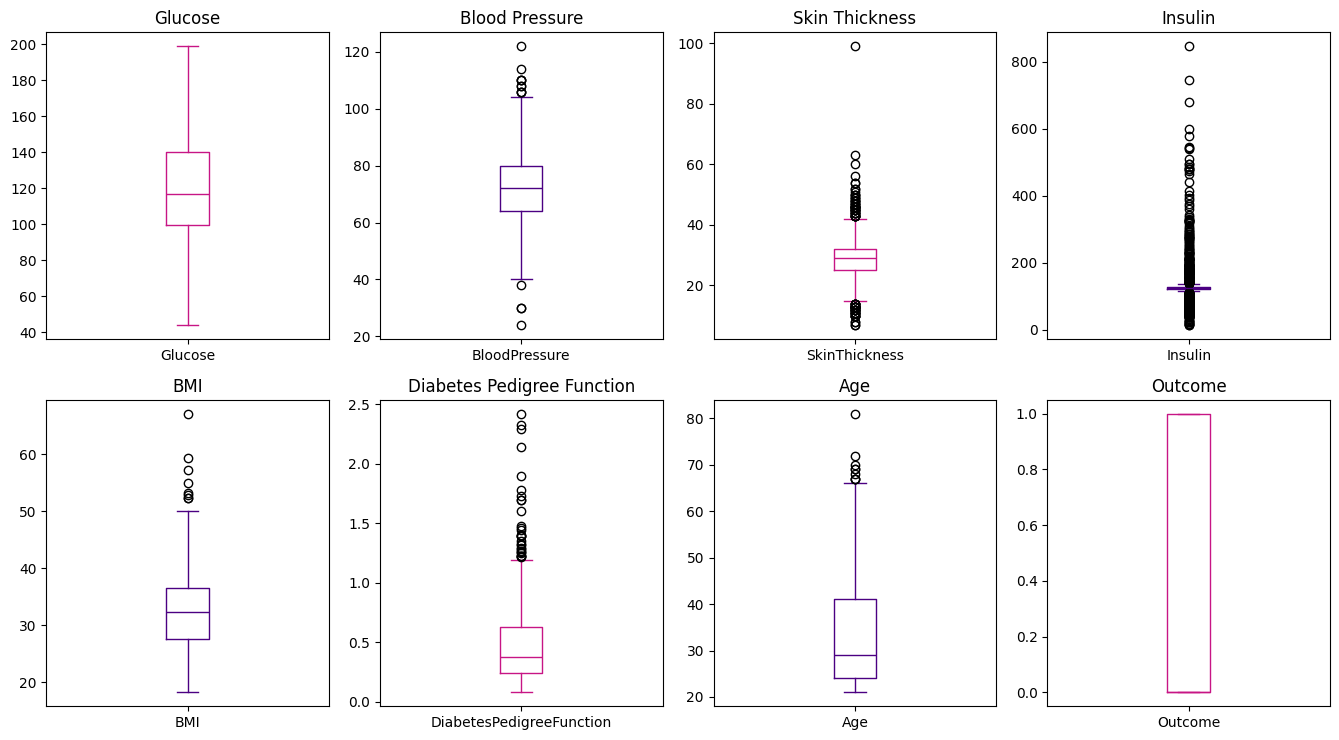

In [374]:
plt.rcParams["figure.figsize"] = [13.50, 7.50]
plt.rcParams["figure.autolayout"] = True
figure, axis = plt.subplots(2, 4)
  
df['Glucose'].plot.box(title="Glucose",ax=axis[0][0],color="MEDIUMVIOLETRED")
df['BloodPressure'].plot.box(title="Blood Pressure",ax=axis[0][1],color="INDIGO")
df['SkinThickness'].plot.box(title="Skin Thickness",ax=axis[0][2],color="MEDIUMVIOLETRED")
df['Insulin'].plot.box(title="Insulin",ax=axis[0][3],color="INDIGO")
df['BMI'].plot.box(title="BMI",ax=axis[1][0],color="INDIGO")
df['DiabetesPedigreeFunction'].plot.box(title="Diabetes Pedigree Function",ax=axis[1][1],color="MEDIUMVIOLETRED")
df['Age'].plot.box(title="Age",ax=axis[1][2],color="INDIGO")
df['Outcome'].plot.box(title="Outcome",ax=axis[1][3],color="MEDIUMVIOLETRED")

 ## Outlier treatments
 1. Detect Outliers: To detect outliers in pandas, you typically begin by calculating summary statistics like the mean and standard deviation. Then, determine a threshold, commonly set to values more than 3 standard deviations from the mean. Use the abs(df - df.mean()) > (3 * df.std()) code snippet to flag outliers in your DataFrame. This boolean mask can then be used to filter out the anomalous data points for further inspection.
 
 2. Visualize Data: Visualization is a key step in outlier detection. Plotting your data using histograms or boxplots can reveal outliers visually. In pandas, you can employ df.plot(kind='box') to generate a boxplot, which displays the median, quartiles, and fliers that may be potential outliers. These plots make it easier to identify data points that fall outside the typical range of values.
 
 3. Z-Score Method: The Z-score method standardizes your data, showing how many standard deviations each point is from the mean. In pandas, you can calculate the Z-score using scipy.stats.zscore(df) . Typically, a Z-score above 3 or below -3 is considered an outlier. This method is particularly effective for datasets that follow a normal distribution.

 4. IQR Technique: The Interquartile Range (IQR) technique is another robust method for identifying outliers. Calculate the IQR by subtracting the first quartile (Q1) from the third quartile (Q3). Then, find outliers by looking for data points that fall below Q1 - 1.5 * IQR or above Q3 + 1.5 * IQR . Pandas allows you to compute these quartiles and apply these criteria to filter out the outliers.

 5. Correct Outliers: Once outliers are identified, you have several options for correction. You can remove them using df = df[~outlier_mask] or replace them with a central tendency measure like the mean or median. Alternatively, outliers can be capped at a certain value with df[df > upper_bound] = upper_value . This correction approach should be chosen based on the context and impact on your analysis

**In our case we handle outliers in all columns of a DataFrame df by replacing values that are considered outliers with the mean of that column.**

Outliers treatement in Glucose attribute

In [375]:
Q1 = df.Glucose.quantile(0.25)
Q3 = df.Glucose.quantile(0.75)
IQR = Q3-Q1
lower_limit = Q1-1.5*IQR
upper_limit = Q3+1.5*IQR
df.loc[df['Glucose']<=lower_limit,'Glucose'] = np.mean(df['Glucose'])
df.loc[df['Glucose']>upper_limit, 'Glucose'] = np.mean(df['Glucose'])

Outliers treatement in BloodPressure attribute

In [376]:
Q1 = df.BloodPressure.quantile(0.25)
Q3 = df.BloodPressure.quantile(0.75)
IQR = Q3-Q1
lower_limit = Q1-1.5*IQR
upper_limit = Q3+1.5*IQR
df.loc[df['BloodPressure']<=lower_limit,'BloodPressure'] = np.mean(df['BloodPressure'])
df.loc[df['BloodPressure']>upper_limit,'BloodPressure'] = np.mean(df['BloodPressure'])

Outliers treatement in SkinThickness attribute

In [377]:
Q1 = df.SkinThickness.quantile(0.25)
Q3 = df.SkinThickness.quantile(0.75)
IQR = Q3-Q1
lower_limit = Q1-1.5*IQR
upper_limit = Q3+1.5*IQR
df.loc[df['SkinThickness']<=lower_limit,'SkinThickness'] = np.mean(df['SkinThickness'])
df.loc[df['SkinThickness']>upper_limit,'SkinThickness'] = np.mean(df['SkinThickness'])

Outliers treatement in Insulin attribute

In [378]:
Q1 = df.Insulin.quantile(0.25)
Q3 = df.Insulin.quantile(0.75)
IQR = Q3-Q1
lower_limit = Q1-1.5*IQR
upper_limit = Q3+1.5*IQR
df.loc[df['Insulin']<=lower_limit,'Insulin'] = np.mean(df['Insulin'])
df.loc[df['Insulin']>upper_limit,'Insulin'] = np.mean(df['Insulin'])

Outliers treatement in BMI attribute

In [379]:
Q1 = df.BMI.quantile(0.25)
Q3 = df.BMI.quantile(0.75)
IQR = Q3-Q1
lower_limit = Q1-1.5*IQR
upper_limit = Q3+1.5*IQR
df.loc[df['BMI']<=lower_limit,'BMI'] = np.mean(df['BMI'])
df.loc[df['BMI']>upper_limit,'BMI'] = np.mean(df['BMI'])

Outliers treatement in DiabetesPedigreeFunction attribute

In [380]:
Q1 = df.DiabetesPedigreeFunction.quantile(0.25)
Q3 = df.DiabetesPedigreeFunction.quantile(0.75)
IQR = Q3-Q1
lower_limit = Q1-1.5*IQR
upper_limit = Q3+1.5*IQR
df.loc[df['DiabetesPedigreeFunction']<=lower_limit,'DiabetesPedigreeFunction'] = np.mean(df['DiabetesPedigreeFunction'])
df.loc[df['DiabetesPedigreeFunction']>upper_limit,'DiabetesPedigreeFunction'] = np.mean(df['DiabetesPedigreeFunction'])

Outliers treatement in Age attribute

In [381]:
Q1 = df.Age.quantile(0.25)
Q3 = df.Age.quantile(0.75)
IQR = Q3-Q1
lower_limit = Q1-1.5*IQR
upper_limit = Q3+1.5*IQR
df.loc[df['Age']<=lower_limit,'Age'] = np.mean(df['Age'])
df.loc[df['Age']>upper_limit,'Age'] = np.mean(df['Age'])

Outliers treatement in Outcome attribute

In [382]:
Q1 = df.Outcome.quantile(0.25)
Q3 = df.Outcome.quantile(0.75)
IQR = Q3-Q1
lower_limit = Q1-1.5*IQR
upper_limit = Q3+1.5*IQR
df.loc[df['Outcome']<=lower_limit,'Outcome'] = np.mean(df['Outcome'])
df.loc[df['Outcome']>upper_limit,'Outcome'] = np.mean(df['Outcome'])

<Axes: title={'center': 'Outcome'}>

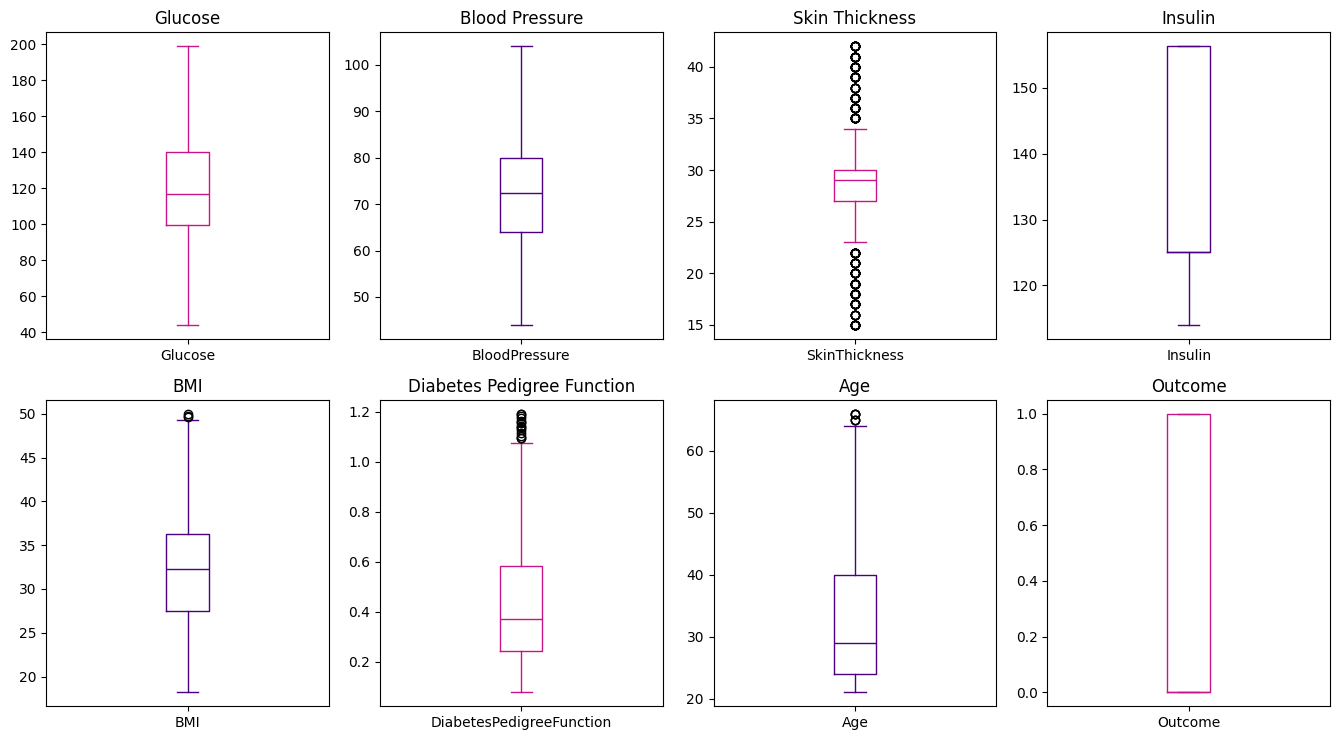

In [383]:
plt.rcParams["figure.figsize"] = [13.50, 7.50]
plt.rcParams["figure.autolayout"] = True
figure, axis = plt.subplots(2, 4)
  
df['Glucose'].plot.box(title="Glucose",ax=axis[0][0],color="MEDIUMVIOLETRED")
df['BloodPressure'].plot.box(title="Blood Pressure",ax=axis[0][1],color="INDIGO")
df['SkinThickness'].plot.box(title="Skin Thickness",ax=axis[0][2],color="MEDIUMVIOLETRED")
df['Insulin'].plot.box(title="Insulin",ax=axis[0][3],color="INDIGO")
df['BMI'].plot.box(title="BMI",ax=axis[1][0],color="INDIGO")
df['DiabetesPedigreeFunction'].plot.box(title="Diabetes Pedigree Function",ax=axis[1][1],color="MEDIUMVIOLETRED")
df['Age'].plot.box(title="Age",ax=axis[1][2],color="INDIGO")
df['Outcome'].plot.box(title="Outcome",ax=axis[1][3],color="MEDIUMVIOLETRED")

## Exporting Preprocessed Dataset

In [384]:
df.to_csv('Diabetes-dataset_1_FS.csv', encoding='utf-8', index=False)